#Cement Strength Dataset

#Feature Description:

1. **CementComponent**:
   - **Description**: This feature represents the amount of cement used in the concrete mix.
   - **Role in Concrete**: Cement acts as a binder that holds the aggregate particles together. It is one of the most critical components affecting the concrete's strength and durability.

2. **BlastFurnaceSlag**:
   - **Description**: This feature indicates the amount of Blast Furnace Slag used in the mix.
   - **Role in Concrete**: Blast Furnace Slag is a byproduct from iron production in blast furnaces. It is used as a supplementary cementitious material to enhance durability and strength, reduce permeability, and improve workability.

3. **FlyAshComponent**:
   - **Description**: This feature measures the amount of Fly Ash added to the concrete mix.
   - **Role in Concrete**: Fly Ash, a byproduct of coal combustion, is used to improve the workability, strength, and durability of concrete. It also helps in reducing the overall cost of the concrete mix.

4. **WaterComponent**:
   - **Description**: This feature represents the amount of water added to the concrete mix.
   - **Role in Concrete**: Water is essential for the chemical reaction that causes the cement to harden and gain strength. The water-cement ratio is crucial; too much water can weaken the concrete, while too little water can make it difficult to mix and place.

5. **SuperplasticizerComponent**:
   - **Description**: This feature shows the amount of superplasticizer used in the mix.
   - **Role in Concrete**: Superplasticizers are high-range water reducers that enhance the workability of concrete without increasing the water content. They help produce high-strength concrete and improve its flow characteristics.

6. **CoarseAggregateComponent**:
   - **Description**: This feature indicates the amount of coarse aggregate used.
   - **Role in Concrete**: Coarse aggregates (like gravel or crushed stone) provide bulk to the concrete mix and significantly affect its strength and durability. They help distribute loads and reduce shrinkage.

7. **FineAggregateComponent**:
   - **Description**: This feature measures the amount of fine aggregate used.
   - **Role in Concrete**: Fine aggregates (like sand) fill the voids between the coarse aggregates and help to produce a dense and cohesive concrete mix. They contribute to the overall workability and strength of the concrete.

8. **AgeInDays**:
   - **Description**: This feature denotes the number of days the concrete has been cured or left to dry.
   - **Role in Concrete**: The curing age affects the concrete's strength development. Concrete continues to gain strength over time, so the age in days is crucial for determining its final strength.

9. **Strength (Target)**:
   - **Description**: This is the target variable representing the final strength of the concrete.
   - **Role in Concrete**: The compressive strength of concrete is a key property that determines its load-bearing capacity and overall performance in construction applications.

### Example Dataset Schema:

| CementComponent | BlastFurnaceSlag | FlyAshComponent | WaterComponent | SuperplasticizerComponent | CoarseAggregateComponent | FineAggregateComponent | AgeInDays | Strength (Target) |
|-----------------|------------------|----------------|----------------|--------------------------|--------------------------|------------------------|-----------|--------------------|
| 300             | 80               | 50             | 180            | 10                       | 1000                     | 600                    | 28        | 40.5               |

### Key Points:

- **Material Composition**: The various components (cement, slag, fly ash, water, superplasticizer, aggregates) are the primary ingredients mixed in specific proportions to achieve desired concrete properties.
- **Curing**: The `AgeInDays` feature is critical as the strength of concrete increases over time due to the hydration process.
- **Target Variable**: The `Strength` feature is the ultimate measure of the performance of the concrete mix.

Understanding these features helps in analyzing how different compositions and curing times affect the final strength of concrete, which is essential for optimizing concrete mixes for various construction needs.

#Load the data

In [ ]:
!gdown 1dtRhTRhhp7iQcLZ7r4HB842K7JPBK-jL

Downloading...
From: https://drive.google.com/uc?id=1dtRhTRhhp7iQcLZ7r4HB842K7JPBK-jL
To: /content/ConcreteStrengthData.csv
100% 59.0k/59.0k [00:00<00:00, 50.2MB/s]


#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, trim_mean
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Dataset Overview


In [ ]:
data = pd.read_csv('ConcreteStrengthData.csv')
df = data.copy()

In [ ]:
df.shape

(1030, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
pd.set_option('display.precision', 2)

In [ ]:
df.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.45
75%,350.00,142.95,118.30,192.00,10.20,1029.40,824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


In [ ]:
df.isnull().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

In [ ]:
df.duplicated().sum()

25

In [ ]:
df = df.drop_duplicates()
df.shape

(1005, 9)

In [ ]:
df.columns

Index(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

#Query on dataset

In [ ]:
len(df[(df['FlyAshComponent'] == 0)])

541

In [ ]:
len(df[(df['FlyAshComponent'] == 0) & (df['BlastFurnaceSlag'] == 0)])

231

In [ ]:
len(df[(df['FlyAshComponent'] == 0) & (df['BlastFurnaceSlag'] == 0) & (df['SuperplasticizerComponent'] == 0)])

208

In [ ]:
target = df['Strength']

In [ ]:
df['AgeInDays'].value_counts()

AgeInDays
28     419
3      129
7      122
56      86
14      62
90      54
100     52
180     26
91      17
365     14
270     13
360      6
120      3
1        2
Name: count, dtype: int64

In [ ]:
age_in_days = df.groupby('AgeInDays')['Strength'].mean().sort_values(ascending=False).round(2)
age_in_days.to_frame()

,Strength
AgeInDays,
91,68.68
270,51.27
56,50.72
100,47.67
365,43.56
180,41.73
360,40.70
90,40.48
120,39.65


In [ ]:
df[(df['AgeInDays']==120) | (df['AgeInDays']==360)]

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
66,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,360,44.70
616,277.0,0.0,0.0,191.0,0.0,968.0,856.0,360,33.70
725,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,120,38.70
730,331.0,0.0,0.0,192.0,0.0,1025.0,821.0,120,39.38
735,349.0,0.0,0.0,192.0,0.0,1056.0,809.0,120,40.86
769,331.0,0.0,0.0,192.0,0.0,978.0,825.0,360,41.24
792,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,360,42.13
814,310.0,0.0,0.0,192.0,0.0,970.0,850.0,360,38.11


In [ ]:
df[df['Strength'] >= 80]

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75


##Outliers

In [ ]:
for c, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr ) | (v >= q3 + 1.5 * iqr)]
  percent = (np.shape(v_col)[0] * 100.0) / (np.shape(df)[0])
  print('Columns %s Outliers = %.2f%%' % (c, percent))

Columns CementComponent  Outliers = 0.00%
Columns BlastFurnaceSlag Outliers = 0.20%
Columns FlyAshComponent Outliers = 0.00%
Columns WaterComponent Outliers = 1.49%
Columns SuperplasticizerComponent Outliers = 1.00%
Columns CoarseAggregateComponent Outliers = 0.00%
Columns FineAggregateComponent Outliers = 0.50%
Columns AgeInDays Outliers = 5.87%
Columns Strength Outliers = 0.80%


##Trim_mean, Skewness, Kurtosis

In [ ]:
columns = df.columns

mean_vs_trimmed_mean = pd.DataFrame({'mean':df[columns].mean(),
                                     'trimmed_mean': df[columns].apply(lambda x: trim_mean(x,proportiontocut=0.1))})

kurtosis_skewness = pd.DataFrame({'kurtosis': df[columns].apply(kurtosis),
                                  'skewness': df[columns].apply(skew)})

print('Mean vs Trimmed Mean:')
print(mean_vs_trimmed_mean)

print('\nKurtosis and Skewness:')
print(kurtosis_skewness)

Mean vs Trimmed Mean:
                             mean  trimmed_mean
CementComponent            278.63        270.19
BlastFurnaceSlag            72.04         60.01
FlyAshComponent             55.54         48.49
WaterComponent             182.08        181.78
SuperplasticizerComponent    6.03          5.38
CoarseAggregateComponent   974.38        975.30
FineAggregateComponent     772.69        775.43
AgeInDays                   45.86         32.51
Strength                    35.25         34.48

Kurtosis and Skewness:
                           kurtosis  skewness
CementComponent               -0.44      0.56
BlastFurnaceSlag              -0.41      0.85
FlyAshComponent               -1.37      0.50
WaterComponent                 0.16      0.03
SuperplasticizerComponent      1.68      0.98
CoarseAggregateComponent      -0.59     -0.07
FineAggregateComponent        -0.11     -0.25
AgeInDays                     11.90      3.25
Strength                      -0.31      0.40


#Visualization

##Histogram

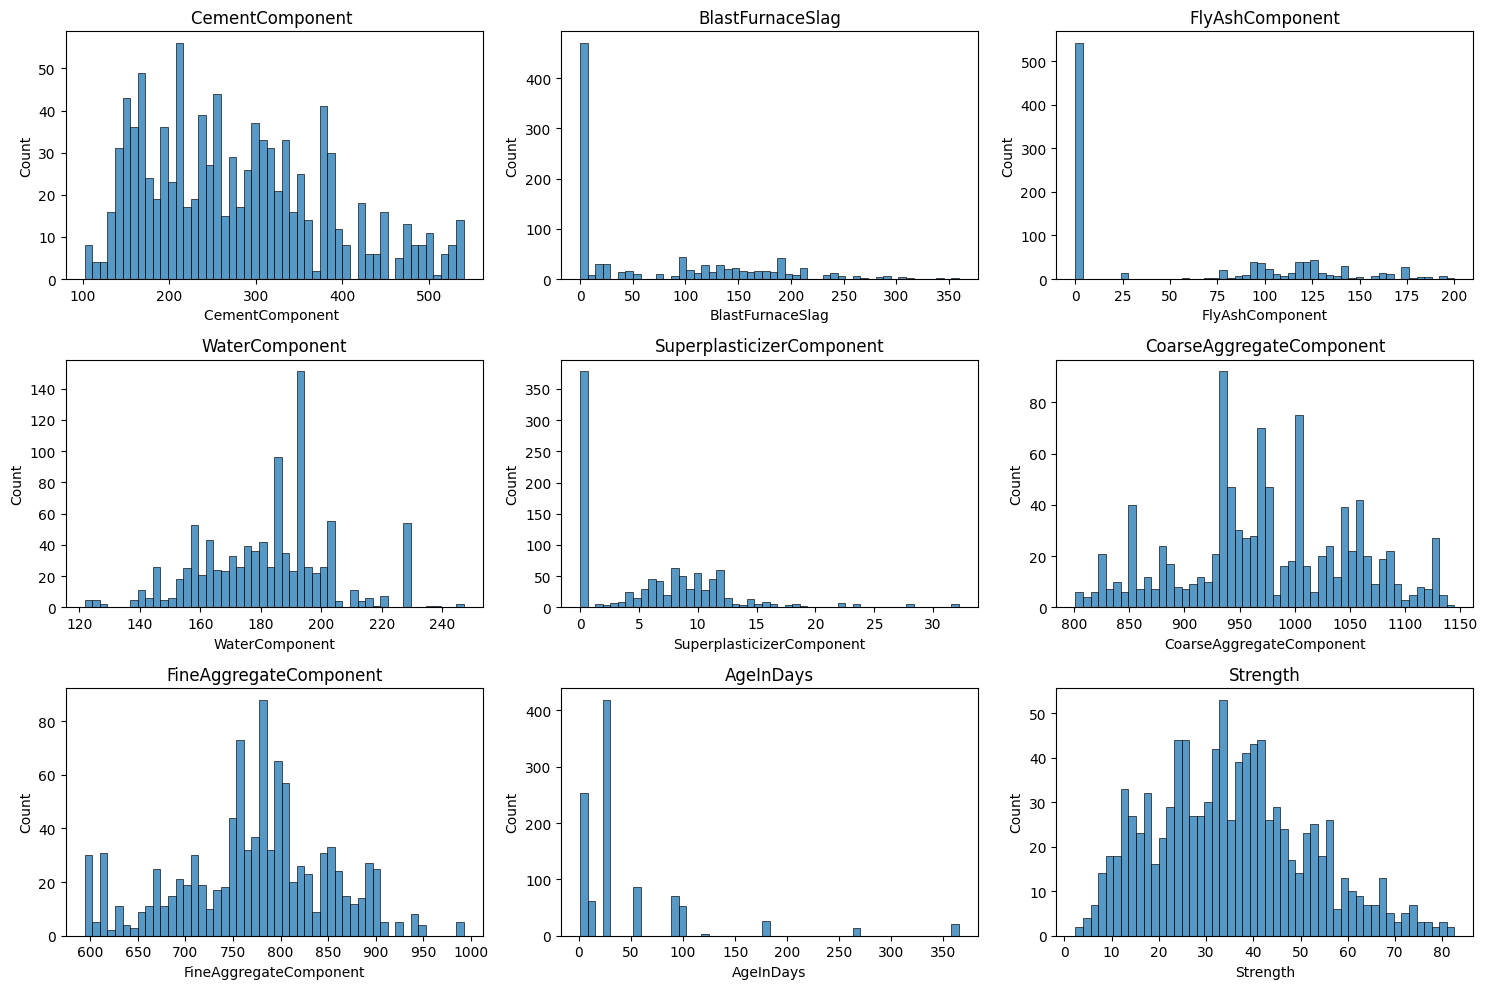

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()
index = 0
for index, column in enumerate(df.columns):
  sns.histplot(df[column], ax=axs[index], bins=50)
  axs[index].set_title(column)

plt.tight_layout()


#BoxPlot

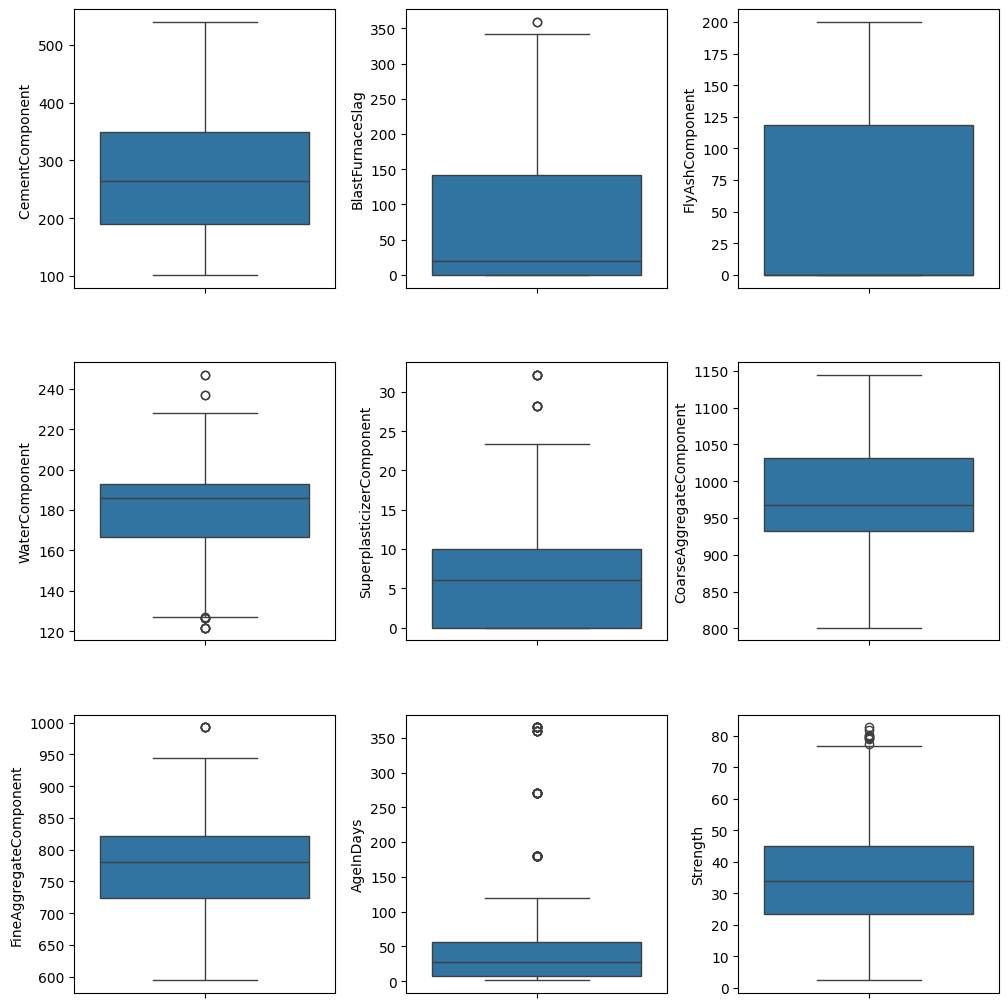

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
index = 0
axs = axs.flatten()
for column in df.columns:
  sns.boxplot(y=column, data=df, ax = axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

##Correlation & Heatmap

In [ ]:
corr_matrix = df.corr()
corr_matrix['Strength'].sort_values(ascending=False)

Strength                     1.00
CementComponent              0.49
SuperplasticizerComponent    0.34
AgeInDays                    0.34
BlastFurnaceSlag             0.10
FlyAshComponent             -0.08
CoarseAggregateComponent    -0.14
FineAggregateComponent      -0.19
WaterComponent              -0.27
Name: Strength, dtype: float64

In [ ]:
corr_matrix = df.corr().abs()
corr_matrix['Strength'].sort_values(ascending=False)

Strength                     1.00
CementComponent              0.49
SuperplasticizerComponent    0.34
AgeInDays                    0.34
WaterComponent               0.27
FineAggregateComponent       0.19
CoarseAggregateComponent     0.14
BlastFurnaceSlag             0.10
FlyAshComponent              0.08
Name: Strength, dtype: float64

<Axes: >

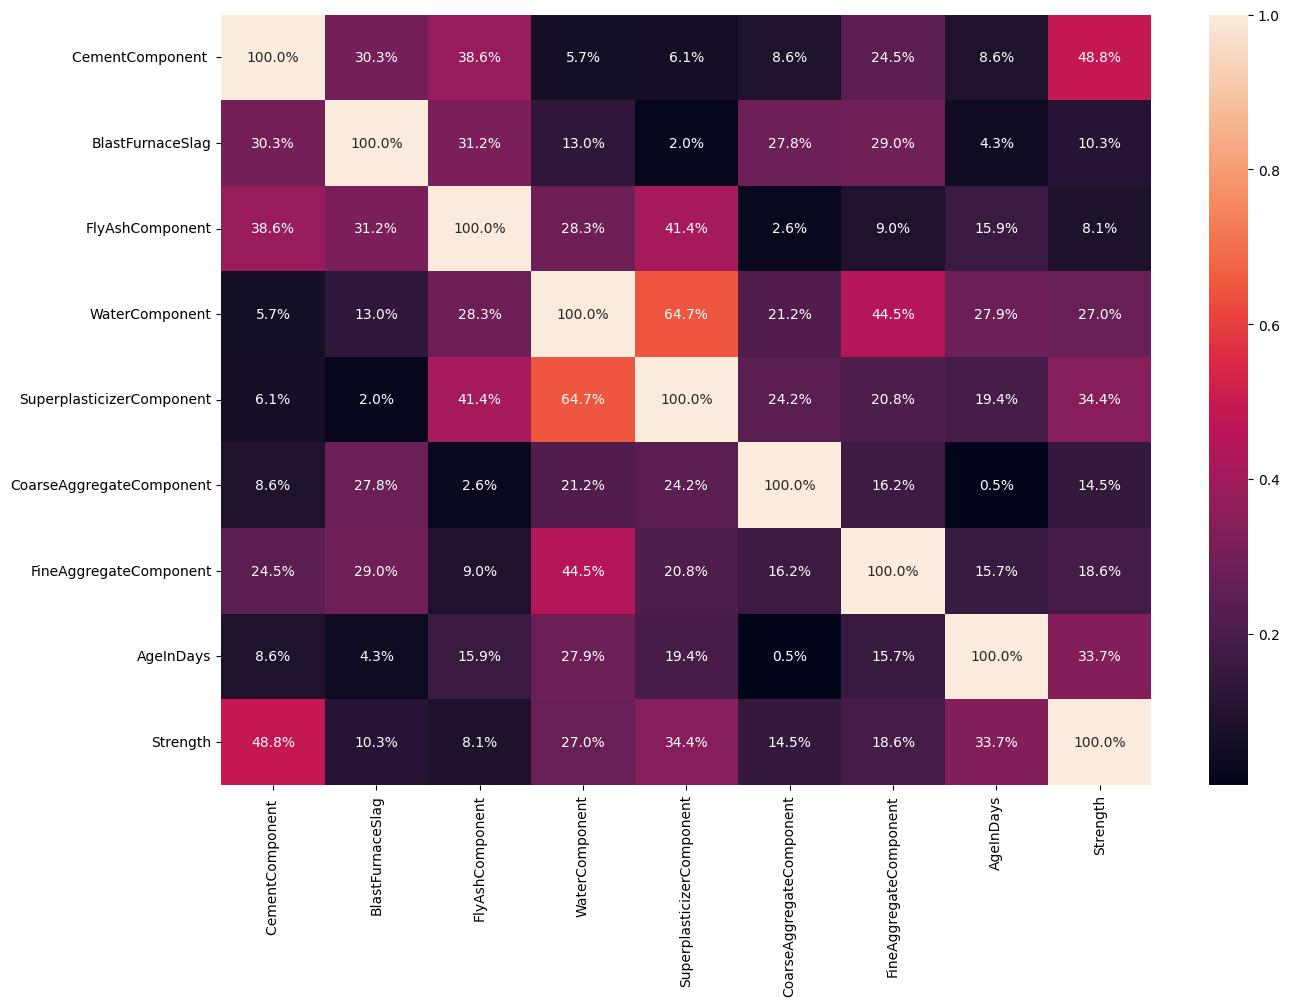

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr().abs(),fmt='.1%',annot=True)

In [ ]:
print('The highest correlation between feautures:\n')

for x in range(len(df.columns)):
  corr_matrix.iloc[x,x] = 0.0
corr_matrix.abs().idxmax()

The highest correlation between feautures:



CementComponent                               Strength
BlastFurnaceSlag                       FlyAshComponent
FlyAshComponent              SuperplasticizerComponent
WaterComponent               SuperplasticizerComponent
SuperplasticizerComponent               WaterComponent
CoarseAggregateComponent              BlastFurnaceSlag
FineAggregateComponent                  WaterComponent
AgeInDays                                     Strength
Strength                              CementComponent 
dtype: object

#Preprocessing, Part1:
##Outlier Handling

Columns AgeInDays Outliers = 5.87%
I just want to use lpg1p and sqrt on this columns to check if the ouliers will lower or not.

In [ ]:
df['AgeInDays_sqrt'] = np.sqrt(df['AgeInDays'])
df['AgeInDays_log'] = np.log1p(df['AgeInDays'])

skewness_before = df[['AgeInDays']].apply(skew)
skewness_after_sqrt = df[['AgeInDays_sqrt']].apply(skew)
skewness_after_log = df[['AgeInDays_sqrt']].apply(skew)

print('Skewness Before Transformation:')
print(skewness_before)
print('\nSkewness after sqrt:')
print(skewness_after_sqrt)
print('\nSkewness after log:')
print(skewness_after_log)

Skewness Before Transformation:
AgeInDays    3.25
dtype: float64

Skewness after sqrt:
AgeInDays_sqrt    1.58
dtype: float64

Skewness after log:
AgeInDays_sqrt    1.58
dtype: float64


Both sqrt and log1p has the same result on the column so I choose the log1p and drop the other two.

In [ ]:
df = df.drop(columns=['AgeInDays', 'AgeInDays_sqrt'], axis=1)
df.shape

(1005, 9)

#Preprocessing, Part2:


##Split the Data


In [ ]:
X = df.drop(['Strength'], axis=1)
y = df['Strength'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((804, 8), (201, 8))

##Normalize the data

Since the columns' values are in different scales, we need to normalize the data before implementing and evaluating the models on our dataset.

In [ ]:
sc = MinMaxScaler()
X_train_scales = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)